In [9]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
file_path = "resources/cleaned_1976-2020-president.csv"
data = pd.read_csv(file_path)

# Preview the data to understand its structure
data.head()



,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,vote_share
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,0.0,DEMOCRAT,0.807793
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,0.0,REPUBLICAN,0.617723
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,20210113,0.0,OTHER,0.011272
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,False,6669,1182850,20210113,0.0,OTHER,0.008173
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,False,1954,1182850,20210113,0.0,OTHER,0.002395


In [10]:
# Filter out Democrat and Republican parties
non_major_parties = data[(data['party_detailed'] != 'DEMOCRAT') & (data['party_detailed'] != 'REPUBLICAN')]

# Display unique parties to understand which third parties had significant turnout
print(non_major_parties['party_detailed'].unique())

# Show a summary of vote counts for non-major parties
non_major_parties_summary = non_major_parties.groupby('party_detailed')['candidatevotes'].sum().sort_values(ascending=False)
print(non_major_parties_summary)


['AMERICAN INDEPENDENT PARTY' 'PROHIBITION' 'COMMUNIST PARTY USE'
 'LIBERTARIAN' '0' 'INDEPENDENT' 'SOCIALIST WORKERS' 'AMERICAN'
 'PEACE & FREEDOM' 'U.S. LABOR' 'NO PARTY AFFILIATION' 'SOCIALIST LABOR'
 'AMERICAN PARTY OF IOWA' 'SOCIALIST U.S.A.' 'CONSERVATIVE' 'HUMAN RIGHTS'
 "MCCARTHY '76" "PEOPLE'S" 'INTERNATIONAL DEVELOPMENT BANK'
 'INDUSTRIAL GOVERNMENT PARTY' 'SOCIALIST' 'LIBERAL PARTY'
 'FREE LIBERTARIAN' 'LABOR' 'CONSTITUTION PARTY' 'CONCERNED CITIZENS'
 'STATESMAN' 'CITIZENS' 'WORKERS WORLD' 'NATIONAL UNITY CAMPAIGN'
 'ANDERSON COALITION' 'NOMINATED BY PETITION' 'RESPECT FOR LIFE'
 'RIGHT-TO-LIFE' 'MIDDLE CLASS CANDIDATE' 'DOWN WITH LAWYERS'
 "NATURAL PEOPLE'S LEAGUE" 'POPULIST' 'ALLIANCE'
 'UNITED SOVEREIGN CITIZENS' 'WORKERS LEAGUE' 'BIG DEAL PARTY'
 'NATIONAL UNITY' 'NEW ALLIANCE' 'NATIONAL ECONOMIC RECOVERY'
 'THIRD WORLD ASSEMBLY' 'SOLIDARITY' 'PATRIOTIC PARTY' 'OTHER'
 'PROGRESSIVE' 'GRASSROOTS' 'CONSUMER' 'WRITE-IN' 'UNITED CITIZENS'
 'LIBERTY UNION PARTY' 'AMERICA FIR

Unique party names after removal:
['DEMOCRAT' 'REPUBLICAN' 'AMERICAN INDEPENDENT PARTY' 'PROHIBITION'
 'COMMUNIST PARTY USE' 'LIBERTARIAN' 'INDEPENDENT' 'SOCIALIST WORKERS'
 'AMERICAN' 'PEACE & FREEDOM' 'U.S. LABOR' 'NO PARTY AFFILIATION'
 'SOCIALIST LABOR' 'AMERICAN PARTY OF IOWA' 'SOCIALIST U.S.A.'
 'CONSERVATIVE' 'HUMAN RIGHTS' "MCCARTHY '76" "PEOPLE'S"
 'INTERNATIONAL DEVELOPMENT BANK' 'INDUSTRIAL GOVERNMENT PARTY'
 'SOCIALIST' 'LIBERAL PARTY' 'FREE LIBERTARIAN' 'LABOR'
 'CONSTITUTION PARTY' 'CONCERNED CITIZENS' 'STATESMAN' 'CITIZENS'
 'WORKERS WORLD' 'NATIONAL UNITY CAMPAIGN' 'ANDERSON COALITION'
 'NOMINATED BY PETITION' 'RESPECT FOR LIFE' 'RIGHT-TO-LIFE'
 'MIDDLE CLASS CANDIDATE' 'DOWN WITH LAWYERS' "NATURAL PEOPLE'S LEAGUE"
 'POPULIST' 'ALLIANCE' 'UNITED SOVEREIGN CITIZENS' 'WORKERS LEAGUE'
 'BIG DEAL PARTY' 'NATIONAL UNITY' 'NEW ALLIANCE'
 'NATIONAL ECONOMIC RECOVERY' 'THIRD WORLD ASSEMBLY' 'SOLIDARITY'
 'PATRIOTIC PARTY' 'OTHER' 'PROGRESSIVE' 'GRASSROOTS' 'CONSUMER'
 'WRITE-IN

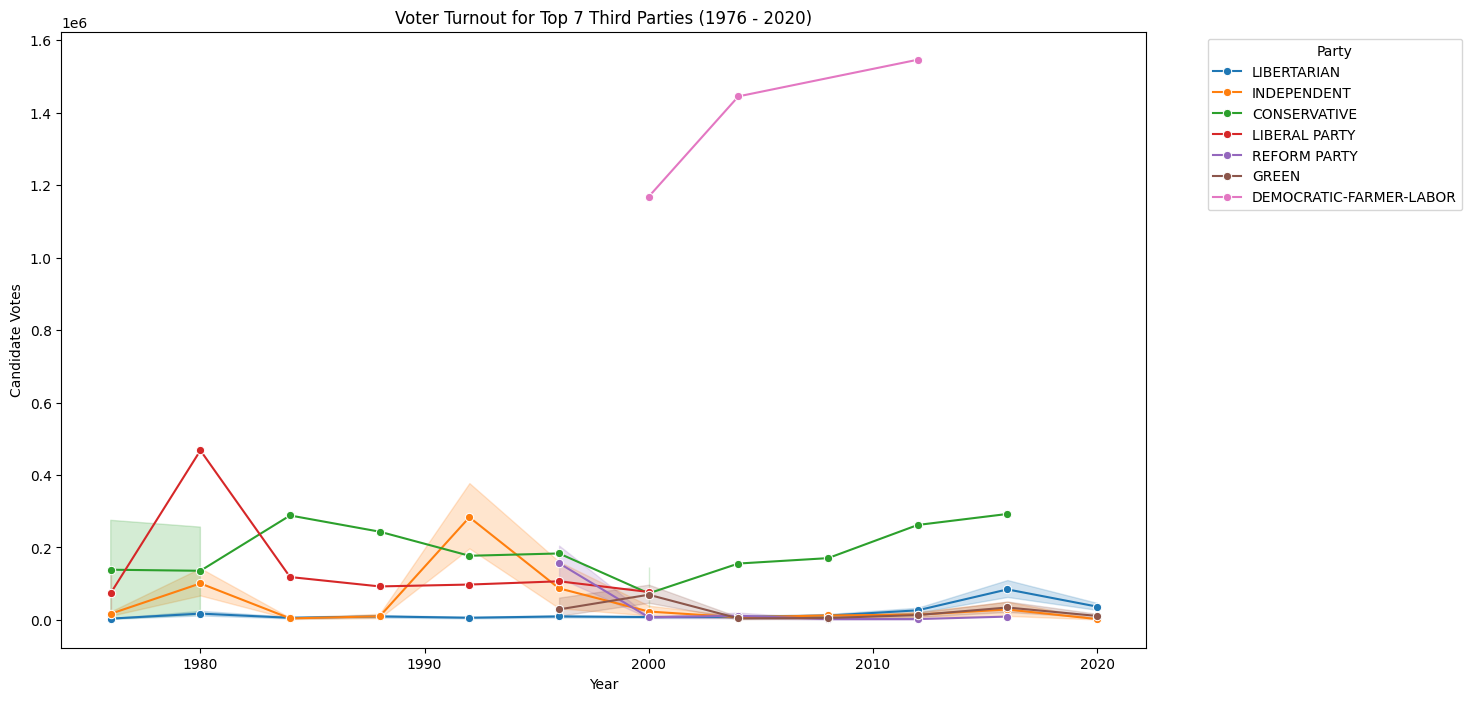

In [15]:
# Remove rows where party_detailed is "0"
data = data[data['party_detailed'] != '0']

# Verify that "0" has been removed from the party names
print("Unique party names after removal:")
print(data['party_detailed'].unique())
# Filter out Democrat and Republican parties
non_major_parties = data[(data['party_detailed'] != 'DEMOCRAT') & (data['party_detailed'] != 'REPUBLICAN')]

# Identify the top 7 third parties based on total votes received
top_7_third_parties = non_major_parties.groupby('party_detailed')['candidatevotes'].sum().nlargest(7).index

# Filter the dataset to only include the top 7 third parties
top_7_data = non_major_parties[non_major_parties['party_detailed'].isin(top_7_third_parties)]

# Plot voter turnout over time for the top 7 third parties
plt.figure(figsize=(14, 8))
sns.lineplot(data=top_7_data, x="year", y="candidatevotes", hue="party_detailed", marker="o")
plt.title("Voter Turnout for Top 7 Third Parties (1976 - 2020)")
plt.xlabel("Year")
plt.ylabel("Candidate Votes")
plt.legend(title="Party", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Unique party names after removal:
['DEMOCRAT' 'REPUBLICAN' 'AMERICAN INDEPENDENT PARTY' 'PROHIBITION'
 'COMMUNIST PARTY USE' 'LIBERTARIAN' 'INDEPENDENT' 'SOCIALIST WORKERS'
 'AMERICAN' 'PEACE & FREEDOM' 'U.S. LABOR' 'NO PARTY AFFILIATION'
 'SOCIALIST LABOR' 'AMERICAN PARTY OF IOWA' 'SOCIALIST U.S.A.'
 'CONSERVATIVE' 'HUMAN RIGHTS' "MCCARTHY '76" "PEOPLE'S"
 'INTERNATIONAL DEVELOPMENT BANK' 'INDUSTRIAL GOVERNMENT PARTY'
 'SOCIALIST' 'LIBERAL PARTY' 'FREE LIBERTARIAN' 'LABOR'
 'CONSTITUTION PARTY' 'CONCERNED CITIZENS' 'STATESMAN' 'CITIZENS'
 'WORKERS WORLD' 'NATIONAL UNITY CAMPAIGN' 'ANDERSON COALITION'
 'NOMINATED BY PETITION' 'RESPECT FOR LIFE' 'RIGHT-TO-LIFE'
 'MIDDLE CLASS CANDIDATE' 'DOWN WITH LAWYERS' "NATURAL PEOPLE'S LEAGUE"
 'POPULIST' 'ALLIANCE' 'UNITED SOVEREIGN CITIZENS' 'WORKERS LEAGUE'
 'BIG DEAL PARTY' 'NATIONAL UNITY' 'NEW ALLIANCE'
 'NATIONAL ECONOMIC RECOVERY' 'THIRD WORLD ASSEMBLY' 'SOLIDARITY'
 'PATRIOTIC PARTY' 'OTHER' 'PROGRESSIVE' 'GRASSROOTS' 'CONSUMER'
 'WRITE-IN

C:\Users\ntrie\AppData\Local\Temp\ipykernel_43220\1044645489.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_7_third_parties.index, y=top_7_third_parties.values, palette="viridis")


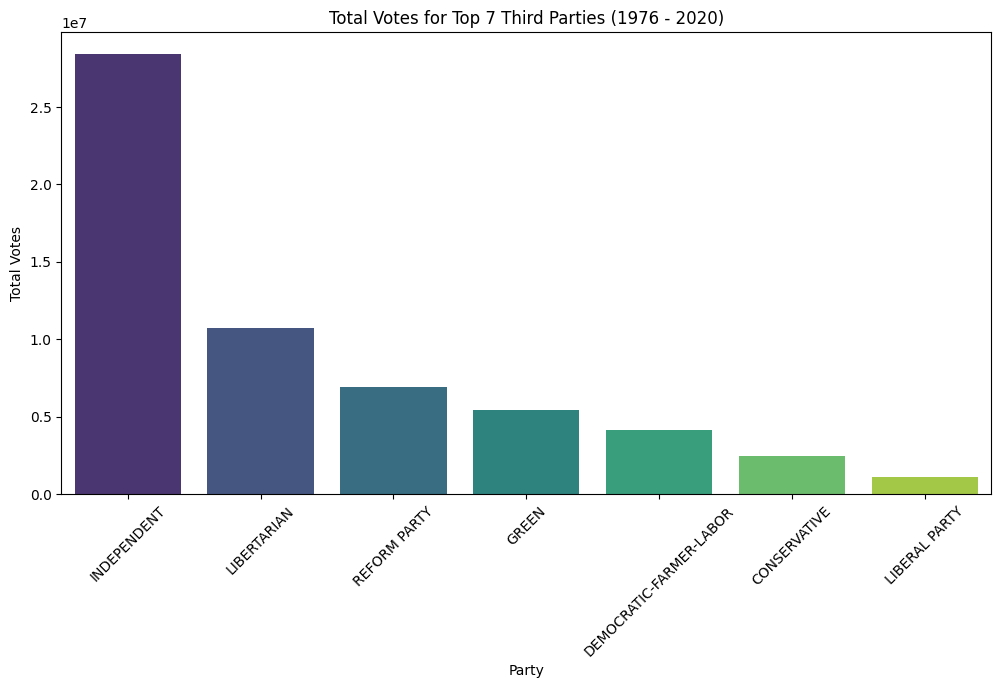

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
file_path = "resources/cleaned_1976-2020-president.csv"
data = pd.read_csv(file_path)
# Remove rows where party_detailed is "0"
data = data[data['party_detailed'] != '0']

# Verify that "0" has been removed from the party names
print("Unique party names after removal:")
print(data['party_detailed'].unique())
# Filter out Democrat and Republican parties
non_major_parties = data[(data['party_detailed'] != 'DEMOCRAT') & (data['party_detailed'] != 'REPUBLICAN')]

# Identify the top 7 third parties based on total votes received
top_7_third_parties = non_major_parties.groupby('party_detailed')['candidatevotes'].sum().nlargest(7)

# Plot total votes for the top 7 third parties as a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_7_third_parties.index, y=top_7_third_parties.values, palette="viridis")
plt.title("Total Votes for Top 7 Third Parties (1976 - 2020)")
plt.xlabel("Party")
plt.ylabel("Total Votes")
plt.xticks(rotation=45)
plt.show()

In [16]:
# Filter out Democrat and Republican candidates
third_party_candidates = data[(data['party_detailed'] != 'DEMOCRAT') & (data['party_detailed'] != 'REPUBLICAN')]

# Find the top third-party candidates based on the total votes received
top_third_party_candidates = third_party_candidates.groupby(['candidate', 'party_detailed'])['candidatevotes'].sum().nlargest(10)

# Display the top third-party candidates with the most votes
print("Top 3rd Party Candidates by Total Votes (1976 - 2020):")
print(top_third_party_candidates)

Top 3rd Party Candidates by Total Votes (1976 - 2020):
candidate          party_detailed         
PEROT, ROSS        INDEPENDENT                20126507
                   REFORM PARTY                6568145
JOHNSON, GARY      LIBERTARIAN                 5341570
ANDERSON, JOHN B.  INDEPENDENT                 4833348
NADER, RALPH       GREEN                       3023585
JORGENSEN, JO      LIBERTARIAN                 1797355
STEIN, JILL        GREEN                       1763293
OBAMA, BARACK H.   DEMOCRATIC-FARMER-LABOR     1546167
KERRY, JOHN        DEMOCRATIC-FARMER-LABOR     1445014
0                  INDEPENDENT                 1373801
Name: candidatevotes, dtype: int64


In [19]:
# Filter out Democrat, Republican, Democratic-Farmer-Labor, Conservative, and Liberal parties
third_party_data = data[
    (data['party_detailed'] != 'DEMOCRAT') & 
    (data['party_detailed'] != 'REPUBLICAN') & 
    (data['party_detailed'] != 'DEMOCRATIC-FARMER-LABOR') & 
    (data['party_detailed'] != 'CONSERVATIVE') & 
    (data['party_detailed'] != 'LIBERAL')
]

# Calculate total votes by year to get the base for percentage calculation
total_votes_per_year = data.groupby('year')['candidatevotes'].sum()

# Add a new column for the percentage of total votes each third-party received by year
third_party_data = third_party_data.copy()  # To avoid SettingWithCopyWarning
third_party_data['vote_percentage'] = third_party_data.apply(
    lambda row: (row['candidatevotes'] / total_votes_per_year[row['year']]) * 100, axis=1
)

# Group by year, party, and candidate to get the total vote percentage per candidate
third_party_vote_percentage = third_party_data.groupby(['year', 'party_detailed', 'candidate'])['vote_percentage'].sum().reset_index()

# Sort by vote percentage to find the top entries
top_third_party_years = third_party_vote_percentage.sort_values(by='vote_percentage', ascending=False).head(10)

# Display the top results
print("Top Years with Highest Third-Party Vote Percentage (Excluding Specific Major and Minor Parties):")
print(top_third_party_years)



Top Years with Highest Third-Party Vote Percentage (Excluding Specific Major and Minor Parties):
     year party_detailed             candidate  vote_percentage
126  1992    INDEPENDENT           PEROT, ROSS        18.887529
186  1996   REFORM PARTY           PEROT, ROSS         6.826837
45   1980    INDEPENDENT     ANDERSON, JOHN B.         5.588747
387  2016    LIBERTARIAN         JOHNSON, GARY         3.040441
202  2000          GREEN          NADER, RALPH         2.377197
465  2020    LIBERTARIAN         JORGENSEN, JO         1.135922
375  2016          GREEN           STEIN, JILL         1.003027
48   1980    LIBERTARIAN  CLARK, EDWARD ""ED""         1.002966
341  2012    LIBERTARIAN         JOHNSON, GARY         0.943656
169  1996    INDEPENDENT                     0         0.752314
